In [6]:
from pyrosm import get_data, OSM
import openeo
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.features import rasterize
path = "/Users/eliasstrauss/PycharmProjects/Sentinel_Building_Segmentation/"

/Users/eliasstrauss/PycharmProjects/Sentinel_Building_Segmentation/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [28]:
def align_buildings_to_sentinel(city):
    tiff = rasterio.open(path + "data/satellite/{}.tiff/openEO.tif".format(city))
    image_tensor = tiff.read([1, 2, 3, 4])

    # remove int16 overflow values by replacing them by the average over all RGB values
    cleaned_avg = np.mean(image_tensor[image_tensor > 0])
    image_tensor[image_tensor < 0] = cleaned_avg

    # normalize data between 0:1
    min_val = np.reshape(np.min(image_tensor, axis=(1, 2)), (-1, 1, 1))
    max_val = np.reshape(np.max(image_tensor, axis=(1, 2)), (-1, 1, 1))
    image_tensor = (image_tensor - min_val) / (max_val/2 - min_val)
    image_tensor[image_tensor > 1.0] = 1.0
    
    # CHW -> HWC
    image_tensor = np.transpose(image_tensor, (1, 2, 0))

    # project to same CRS
    df = gpd.read_file(path + "data/buildings/Berlin_buildings.gpkg")
    df = df.to_crs(tiff.crs)
    building_matrix = rasterize(df["geometry"], out_shape=tiff.shape, transform=tiff.transform)

    assert building_matrix.shape == image_tensor.shape[:2]
    return image_tensor, building_matrix

In [37]:
def plot_city2(city, img, bld, shape=(3, 3), dpi=300):
    height, width = bld.shape
    s_height, s_width = shape[0] * dpi, shape[1] * dpi
    offest_height = int((height - s_height) / 2)
    offset_width = int((width - s_width) / 2)

    s_img = img[offest_height:offest_height + s_height, offset_width:offset_width + s_width]
    s_bld = bld[offest_height:offest_height + s_height, offset_width:offset_width + s_width]

    # R
    fig, ax = plt.subplots(figsize=(shape[1] * 3, shape[0] * 3))
    ax.imshow(s_img[:, :, 0], cmap="gray")
    
    # G
    fig, ax = plt.subplots(figsize=(shape[1] * 3, shape[0] * 3))
    ax.imshow(s_img[:, :, 1], cmap="gray")

    # B
    fig, ax = plt.subplots(figsize=(shape[1] * 3, shape[0] * 3))
    ax.imshow(s_img[:, :, 2], cmap="gray")

In [30]:
def plot_city3(city, img, bld, shape=(3, 3), dpi=300):
    height, width = bld.shape
    s_height, s_width = shape[0] * dpi, shape[1] * dpi
    offest_height = int((height - s_height) / 2)
    offset_width = int((width - s_width) / 2)

    s_img = img[offest_height:offest_height + s_height, offset_width:offset_width + s_width]
    s_bld = bld[offest_height:offest_height + s_height, offset_width:offset_width + s_width]
    
    fig, ax = plt.subplots(figsize=(shape[1] * 3, shape[0] * 3))
    ax.imshow(s_img[:, :, :3])

In [31]:
img, bld = align_buildings_to_sentinel("Berlin")

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

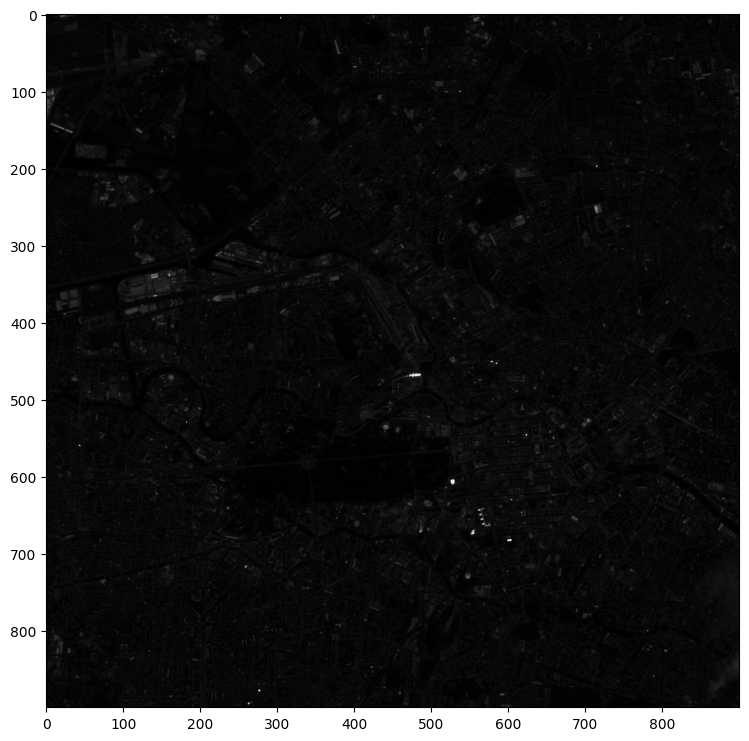

In [8]:
plot_city2("Berlin", img, bld)

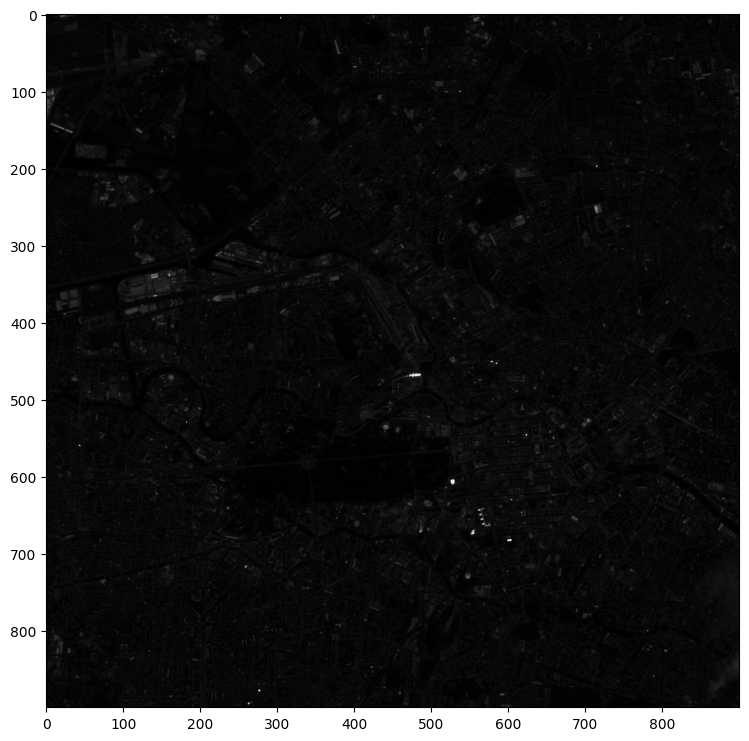

In [10]:
plot_city2("Berlin", img, bld)

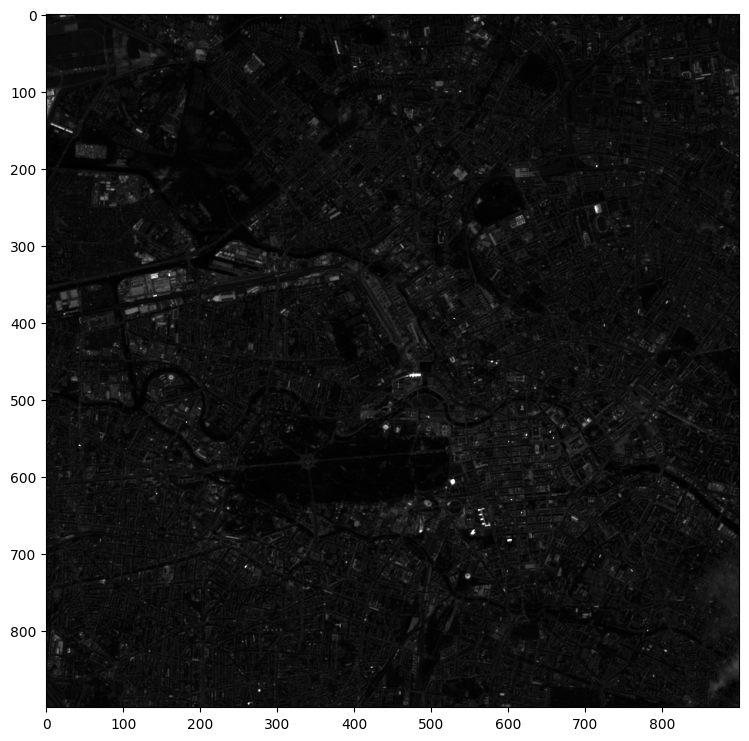

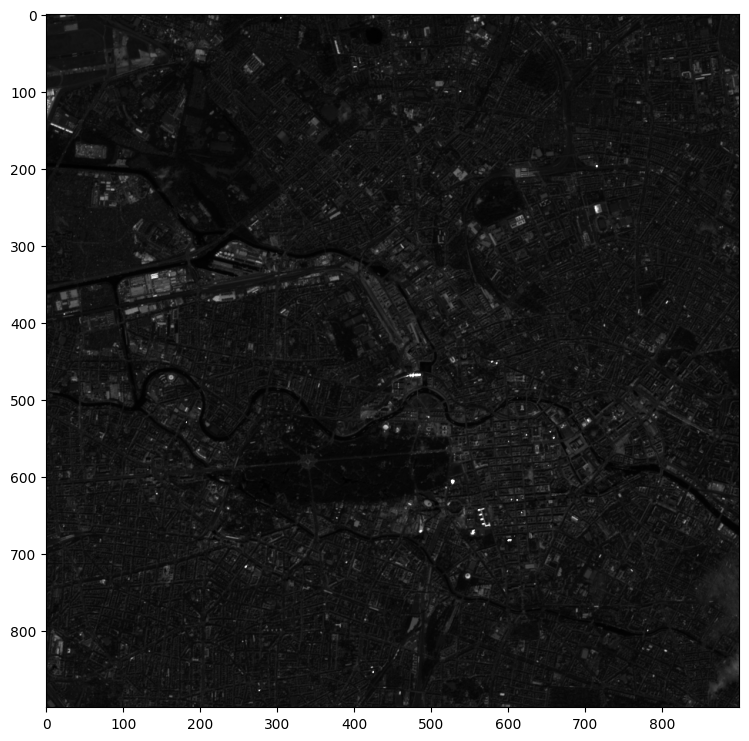

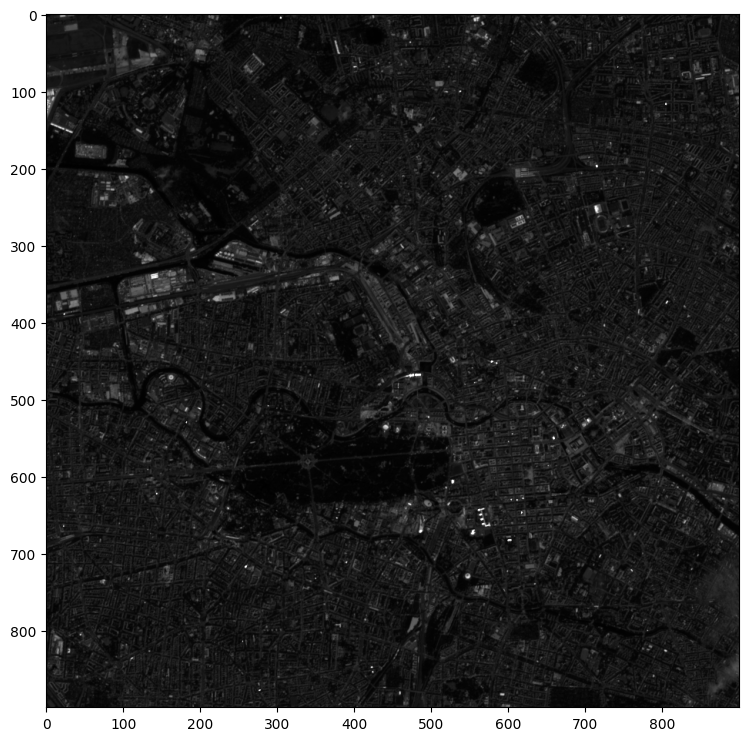

In [38]:
plot_city2("Berlin", img, bld)

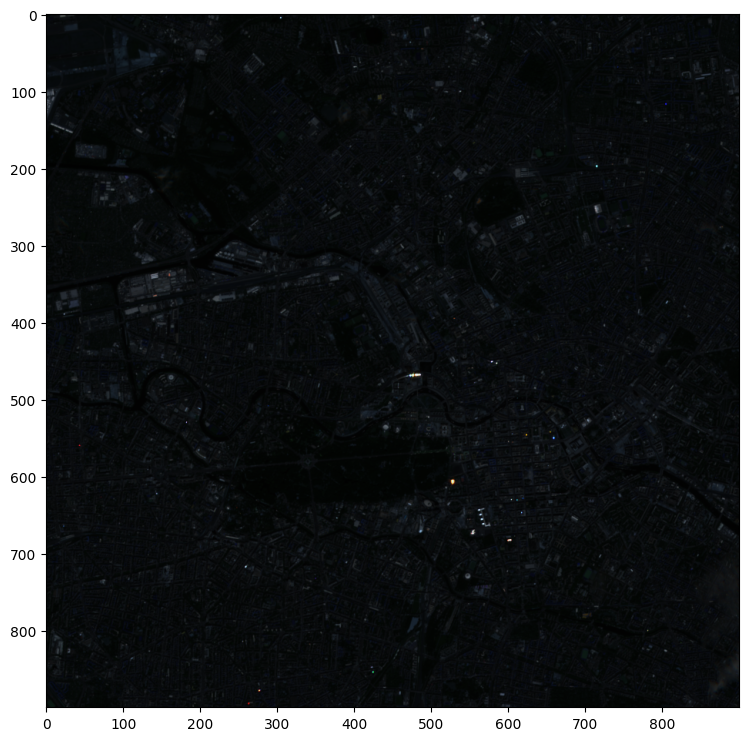

In [12]:
plot_city3("Berlin", img, bld)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008099078341013824..1.8229493087557602].


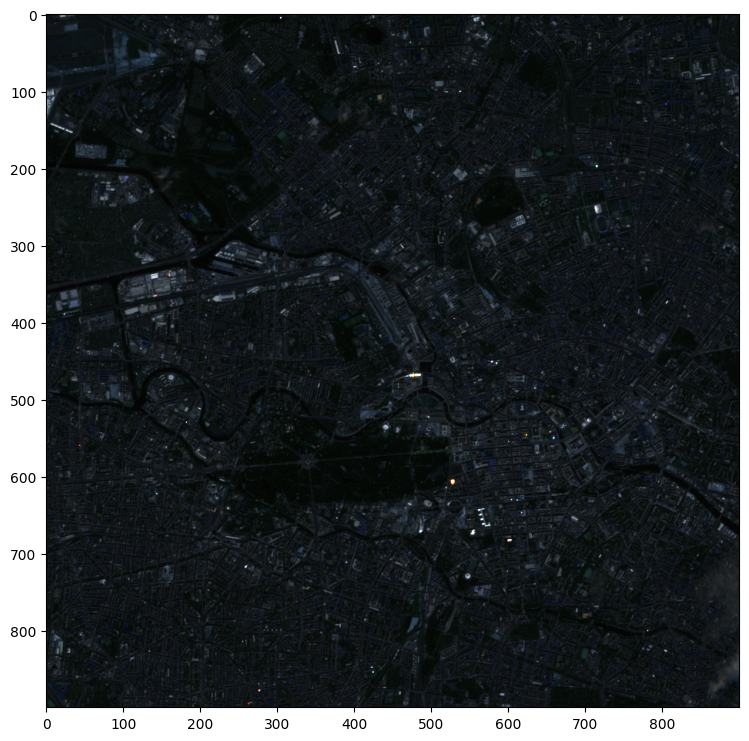

In [20]:
plot_city3("Berlin", img, bld)

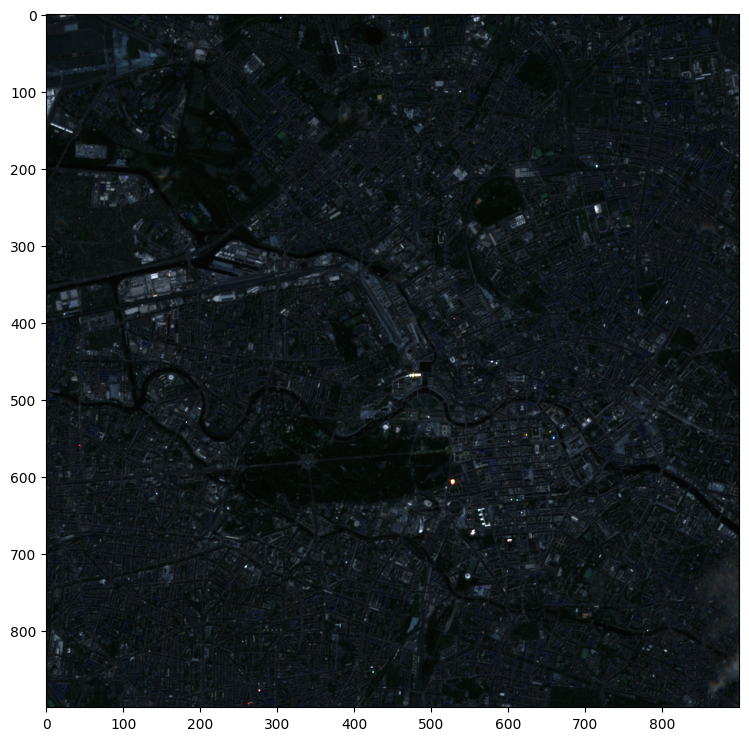

In [33]:
plot_city3("Berlin", img, bld)

In [22]:
shape=(3, 3)
dpi=300
height, width = bld.shape
s_height, s_width = shape[0] * dpi, shape[1] * dpi
offest_height = int((height - s_height) / 2)
offset_width = int((width - s_width) / 2)

s_img = img[offest_height:offest_height + s_height, offset_width:offset_width + s_width]
s_bld = bld[offest_height:offest_height + s_height, offset_width:offset_width + s_width]

scaled_img = s_img[:, :, :3]*1.9

In [24]:
scaled_img.shape

(900, 900, 3)

In [25]:
len(scaled_img[scaled_img > 1.0])

449

In [26]:
len(scaled_img[scaled_img > -1.0])

2430000

In [ ]:

fig, ax = plt.subplots(figsize=(shape[1] * 3, shape[0] * 3))